In [1]:
## import library
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import yfinance as yf

from datetime import datetime

from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
## collect data
df_raw = yf.download("SPOT", start="2013-01-01", end="2022-12-31")

[*********************100%***********************]  1 of 1 completed


In [3]:
## check data
df_raw.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-03 00:00:00-04:00,165.899994,169.000000,148.259995,149.009995,149.009995,30526500
2018-04-04 00:00:00-04:00,140.000000,148.929993,135.509995,144.220001,144.220001,11702900
2018-04-05 00:00:00-04:00,149.229996,152.410004,141.250000,143.990005,143.990005,7372800
2018-04-06 00:00:00-04:00,146.070007,148.729996,144.669998,147.919998,147.919998,4228100
2018-04-09 00:00:00-04:00,149.500000,151.000000,148.589996,150.000000,150.000000,2051400


In [4]:
## backup
df = df_raw.copy()

In [5]:
## check size
df.shape

(1197, 6)

In [7]:
## check missing date
def check_missing_date(dataframe, column):
    df_result = pd.DataFrame(columns=['things', 'min_date', 'max_date', 'number_of_missing_date', 'number_of_not_missing_date', 'number_of_not_missing_date_should_be', 'gap'])
    print('How Much : ', len(dataframe[column].unique()))
    print('------------------------------------------------')
    for i in tqdm(dataframe[column].unique()):
        try:
            try:
                min_date = min(dataframe[dataframe[column]==i].DATE)
            except:
                min_date = min(dataframe[dataframe[column]==i].index)
            try:
                max_date = max(dataframe[dataframe[column]==i].DATE)
            except:
                max_date = max(dataframe[dataframe[column]==i].index)
            try:
                missing_date = pd.date_range(start=min(dataframe.DATE), end=max(dataframe.DATE), freq='W-MON').difference(dataframe[dataframe[column]==i].DATE)
                number_of_missing_date = len(missing_date)
            except:
                missing_date = pd.date_range(start=min(dataframe.index), end=max(dataframe.index), freq='W-MON').difference(dataframe[dataframe[column]==i].index)
                number_of_missing_date = len(missing_date)
#             try:
#                 not_missing_date = dataframe[dataframe[column]==i].DATE.difference(pd.date_range(start=min(dataframe.DATE), end=max(dataframe.DATE), freq='W-MON'))
#                 number_of_not_missing_date = len(not_missing_date)
#             except:
#                 not_missing_date = dataframe[dataframe[column]==i].index.difference(pd.date_range(start=min(dataframe.index), end=max(dataframe.index), freq='W-MON'))
#                 number_of_not_missing_date = len(not_missing_date)
            try:
                not_missing_date_should_be = pd.date_range(start=min_date, end=max_date, freq='W-MON')
                number_of_not_missing_date_should_be = len(not_missing_date_should_be)
            except:
                not_missing_date_should_be = pd.date_range(start=min_date, end=max_date, freq='W-MON')
                number_of_not_missing_date_should_be = len(not_missing_date_should_be)
            number_of_not_missing_date = len(dataframe[dataframe[column]==i].index.unique())
#             number_of_not_missing_date = 286 - number_of_missing_date
            gap = number_of_not_missing_date_should_be - number_of_not_missing_date
#             print('Thing : ', i)
#             print('Min : ', str(min_date))
#             print('Max : ', str(max_date))
#             print('Number of Missing Date : ', str(number_of_missing_date))
#             print('Missing Date List : ', missing_date)
#             print('------------------------------------------------')
            df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date, 
                                          'number_of_missing_date':number_of_missing_date, 'number_of_not_missing_date':number_of_not_missing_date,
                                          'number_of_not_missing_date_should_be':number_of_not_missing_date_should_be, 'gap':gap}, ignore_index=True)
        except:
            print('Pass')
    return df_result
    

In [24]:
check_missing_date(df, 'Close')

  0%|                                                                                                      | 0/1147 [00:00<?, ?it/s]<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be remove

How Much :  1147
------------------------------------------------


<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_

<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
  3%|███▏                                                                                         | 40/1147 [00:00<00:14, 74.16it/s]<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be remove

<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_

<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_

<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_

 15%|█████████████▍                                                                              | 167/1147 [00:02<00:13, 74.63it/s]<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be remove

 17%|████████████████                                                                            | 200/1147 [00:02<00:13, 72.42it/s]<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be remove

<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
 20%|██████████████████▋                                                                         | 233/1147 [00:03<00:12, 74.84it/s]<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be remove

<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
 23%|█████████████████████▎                                                                      | 265/1147 [00:03<00:12, 71.84it/s]<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be remove

<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_

<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_

<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_

<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
 34%|███████████████████████████████▌                                                            | 394/1147 [00:05<00:11, 67.84it/s]<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be remove

<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_

<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_

 42%|██████████████████████████████████████▉                                                     | 486/1147 [00:06<00:08, 77.88it/s]<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be remove

<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
 45%|█████████████████████████████████████████▋                                                  | 520/1147 [00:07<00:08, 74.42it/s]<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be remove

<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
 48%|████████████████████████████████████████████▌                                               | 555/1147 [00:07<00:08, 68.87it/s]<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be remove

<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
 51%|███████████████████████████████████████████████                                             | 587/1147 [00:08<00:07, 73.15it/s]<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be remove

<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_

<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_

<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
 59%|██████████████████████████████████████████████████████▌                                     | 681/1147 [00:09<00:07, 63.96it/s]<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be remove

<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
 62%|█████████████████████████████████████████████████████████                                   | 712/1147 [00:09<00:06, 68.01it/s]<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be remove

<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_

<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_

<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_

<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_

<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_

<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
 79%|████████████████████████████████████████████████████████████████████████▎                   | 902/1147 [00:12<00:03, 74.05it/s]<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be remove

<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
 81%|██████████████████████████████████████████████████████████████████████████▉                 | 934/1147 [00:12<00:02, 71.38it/s]<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be remove

 84%|█████████████████████████████████████████████████████████████████████████████▌              | 967/1147 [00:13<00:02, 70.08it/s]<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be remove

<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
 87%|███████████████████████████████████████████████████████████████████████████████▎           | 1000/1147 [00:13<00:01, 74.08it/s]<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be remove

<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_

 92%|████████████████████████████████████████████████████████████████████████████████████       | 1060/1147 [00:14<00:01, 57.05it/s]<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be remove

<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
 96%|███████████████████████████████████████████████████████████████████████████████████████    | 1097/1147 [00:15<00:00, 77.14it/s]<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be remove

<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_date':max_date,
<ipython-input-7-80a9aea98af7>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'things':i, 'min_date':min_date, 'max_

,things,min_date,max_date,number_of_missing_date,number_of_not_missing_date,number_of_not_missing_date_should_be,gap
0,149.009995,2018-04-03 00:00:00-04:00,2018-04-03 00:00:00-04:00,247,1,0,-1
1,144.220001,2018-04-04 00:00:00-04:00,2018-04-04 00:00:00-04:00,247,1,0,-1
2,143.990005,2018-04-05 00:00:00-04:00,2019-03-21 00:00:00-04:00,247,2,50,48
3,147.919998,2018-04-06 00:00:00-04:00,2018-04-06 00:00:00-04:00,247,1,0,-1
4,150.000000,2018-04-09 00:00:00-04:00,2019-08-05 00:00:00-04:00,244,3,70,67
...,...,...,...,...,...,...,...
1142,77.699997,2022-12-23 00:00:00-05:00,2022-12-23 00:00:00-05:00,247,1,0,-1
1143,76.519997,2022-12-27 00:00:00-05:00,2022-12-27 00:00:00-05:00,247,1,0,-1
1144,76.610001,2022-12-28 00:00:00-05:00,2022-12-28 00:00:00-05:00,247,1,0,-1
1145,79.010002,2022-12-29 00:00:00-05:00,2022-12-29 00:00:00-05:00,247,1,0,-1


In [9]:
## build plotting function
def plot_line(data, cols =[]):
    for col in cols:
        plt.figure(figsize=(20, 5))
        plt.plot(data[col])
        plt.grid(color='black')
        plt.title(col)
        plt.xticks(rotation=90)
        ax = plt.gca()
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
        plt.show()

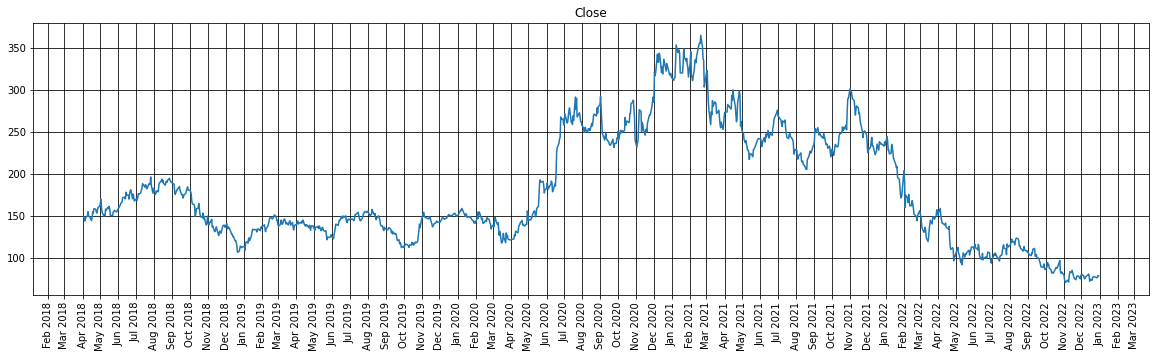

In [10]:
## plot
plot_line(df,['Close'])

<h2>Stationarity Check</h2>

In [11]:
# from statsmodels.tsa.stattools import adfuller
# result = adfuller(df['Avg'])
# print(f'Test Statistics: {result[0]}')
# print(f'p-value: {result[1]}')
# print(f'critical_values: {result[4]}')

In [12]:
# if result[1] > 0.05:
#     print("Series is not stationary")
# else:
#     print("Series is stationary")

<h2>Granger Causality</h2>

In [13]:
# from statsmodels.tsa.stattools import grangercausalitytests

# grangercausalitytests(df_agg_loreal[numeric_col], maxlag=4)
# #p-value<0.05 => reject H0 => Media Cost (Original) influence Impressions

<h2>Modeling</h2>

In [14]:
## create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
## convert the dataframe to a numpy array
dataset = data.values
## get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1138

In [15]:
## scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.26558559],
       [0.24926756],
       [0.24848404],
       ...,
       [0.01894119],
       [0.02711726],
       [0.02691284]])

In [16]:
## create the training data set 
## create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
## split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
## convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

## reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
## x_train.shape

[array([0.26558559, 0.24926756, 0.24848404, 0.26187231, 0.26895823,
       0.28565099, 0.26749338, 0.26589223, 0.26555154, 0.24960825,
       0.26381415, 0.28568509, 0.28077945, 0.29774476, 0.296348  ,
       0.28623018, 0.28030252, 0.29144241, 0.30295699, 0.30871431,
       0.31964981, 0.33709205, 0.3043197 , 0.28347071, 0.26895823,
       0.27113851, 0.26919672, 0.29665464, 0.29202154, 0.30292294,
       0.29863053, 0.30776044, 0.29880082, 0.27168359, 0.26970771,
       0.27042308, 0.28384545, 0.28459493, 0.29144241, 0.28469712,
       0.29069293, 0.29522384, 0.30043607, 0.31266608, 0.31992235,
       0.32223887, 0.32356748, 0.34213393, 0.34516589, 0.33787557,
       0.33988556, 0.36468626, 0.35419365, 0.35191117, 0.33671731,
       0.35889485, 0.36955781, 0.37436125, 0.33835251, 0.35746404])]
[0.3444164105644635]

[array([0.26558559, 0.24926756, 0.24848404, 0.26187231, 0.26895823,
       0.28565099, 0.26749338, 0.26589223, 0.26555154, 0.24960825,
       0.26381415, 0.28568509, 0.280

In [17]:
## build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

## compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

## train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1078/1078 [==============================] - 39s 32ms/step - loss: 0.0034


In [18]:
## create the testing data set
## create a new array containing scaled values
test_data = scaled_data[training_data_len - 60: , :]
## create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
## convert the data to a numpy array
x_test = np.array(x_test)

## reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

## get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

## get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 24ms/step


5.7524975947204835

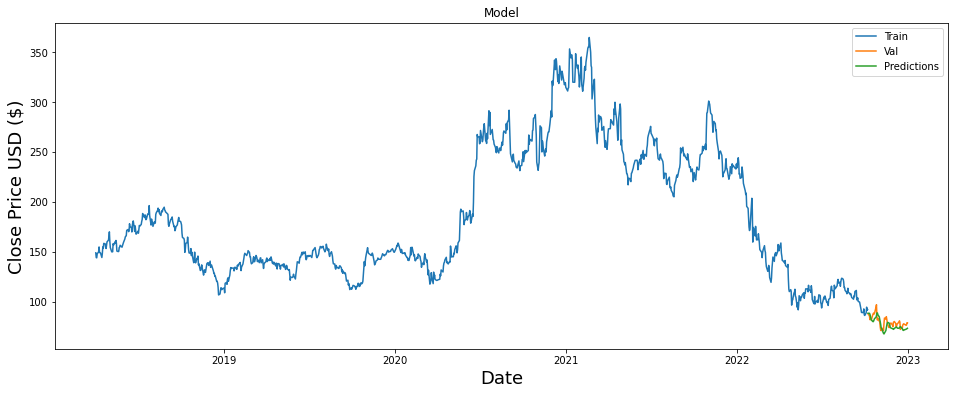

In [22]:
## plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
## visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()

In [20]:
## show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-10-07 00:00:00-04:00,88.010002,88.491386
2022-10-10 00:00:00-04:00,85.970001,88.492516
2022-10-11 00:00:00-04:00,82.129997,87.584518
2022-10-12 00:00:00-04:00,83.180000,85.636414
2022-10-13 00:00:00-04:00,82.650002,83.632095
2022-10-14 00:00:00-04:00,81.790001,81.840607
2022-10-17 00:00:00-04:00,86.720001,80.313576
2022-10-18 00:00:00-04:00,88.040001,80.069099
2022-10-19 00:00:00-04:00,88.750000,80.816223


In [23]:
## save data for streamlit page
valid.to_csv(r'data/valid.csv', index=None, sep=';')
train.to_csv(r'data/train.csv', index=None, sep=';')